In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle
import time

C:\Users\narah\anaconda3\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('./datasets/asthma.csv')

In [3]:
df.head()

,Patient_ID,Age,Gender,Smoking_Status,Asthma_Diagnosis,Medication,Peak_Flow
0,1,26,Female,Non-Smoker,Yes,Inhaler,175
1,2,52,Female,Ex-Smoker,No,None,156
2,3,56,Female,Ex-Smoker,Yes,Inhaler,236
3,4,55,Male,Current Smoker,Yes,Controller Medication,378
4,5,43,Female,Current Smoker,No,None,159


In [4]:
df.isnull().sum()

Patient_ID          0
Age                 0
Gender              0
Smoking_Status      0
Asthma_Diagnosis    0
Medication          0
Peak_Flow           0
dtype: int64

In [5]:
df.shape

(300, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient_ID        300 non-null    int64 
 1   Age               300 non-null    int64 
 2   Gender            300 non-null    object
 3   Smoking_Status    300 non-null    object
 4   Asthma_Diagnosis  300 non-null    object
 5   Medication        300 non-null    object
 6   Peak_Flow         300 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 16.5+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
for column in ['Gender','Smoking_Status','Asthma_Diagnosis','Medication']:
    df[column] = LabelEncoder().fit_transform(df[column])

In [8]:
df.head()

,Patient_ID,Age,Gender,Smoking_Status,Asthma_Diagnosis,Medication,Peak_Flow
0,1,26,0,2,1,1,175
1,2,52,0,1,0,2,156
2,3,56,0,1,1,1,236
3,4,55,1,0,1,0,378
4,5,43,0,0,0,2,159


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Patient_ID        300 non-null    int64
 1   Age               300 non-null    int64
 2   Gender            300 non-null    int32
 3   Smoking_Status    300 non-null    int32
 4   Asthma_Diagnosis  300 non-null    int32
 5   Medication        300 non-null    int32
 6   Peak_Flow         300 non-null    int64
dtypes: int32(4), int64(3)
memory usage: 11.8 KB


<AxesSubplot:>

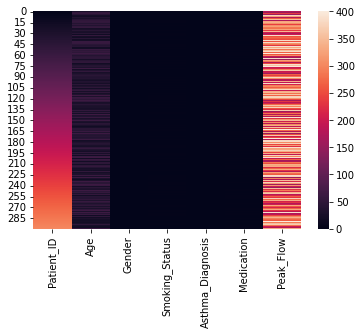

In [10]:
import seaborn as sns
sns.heatmap(df)

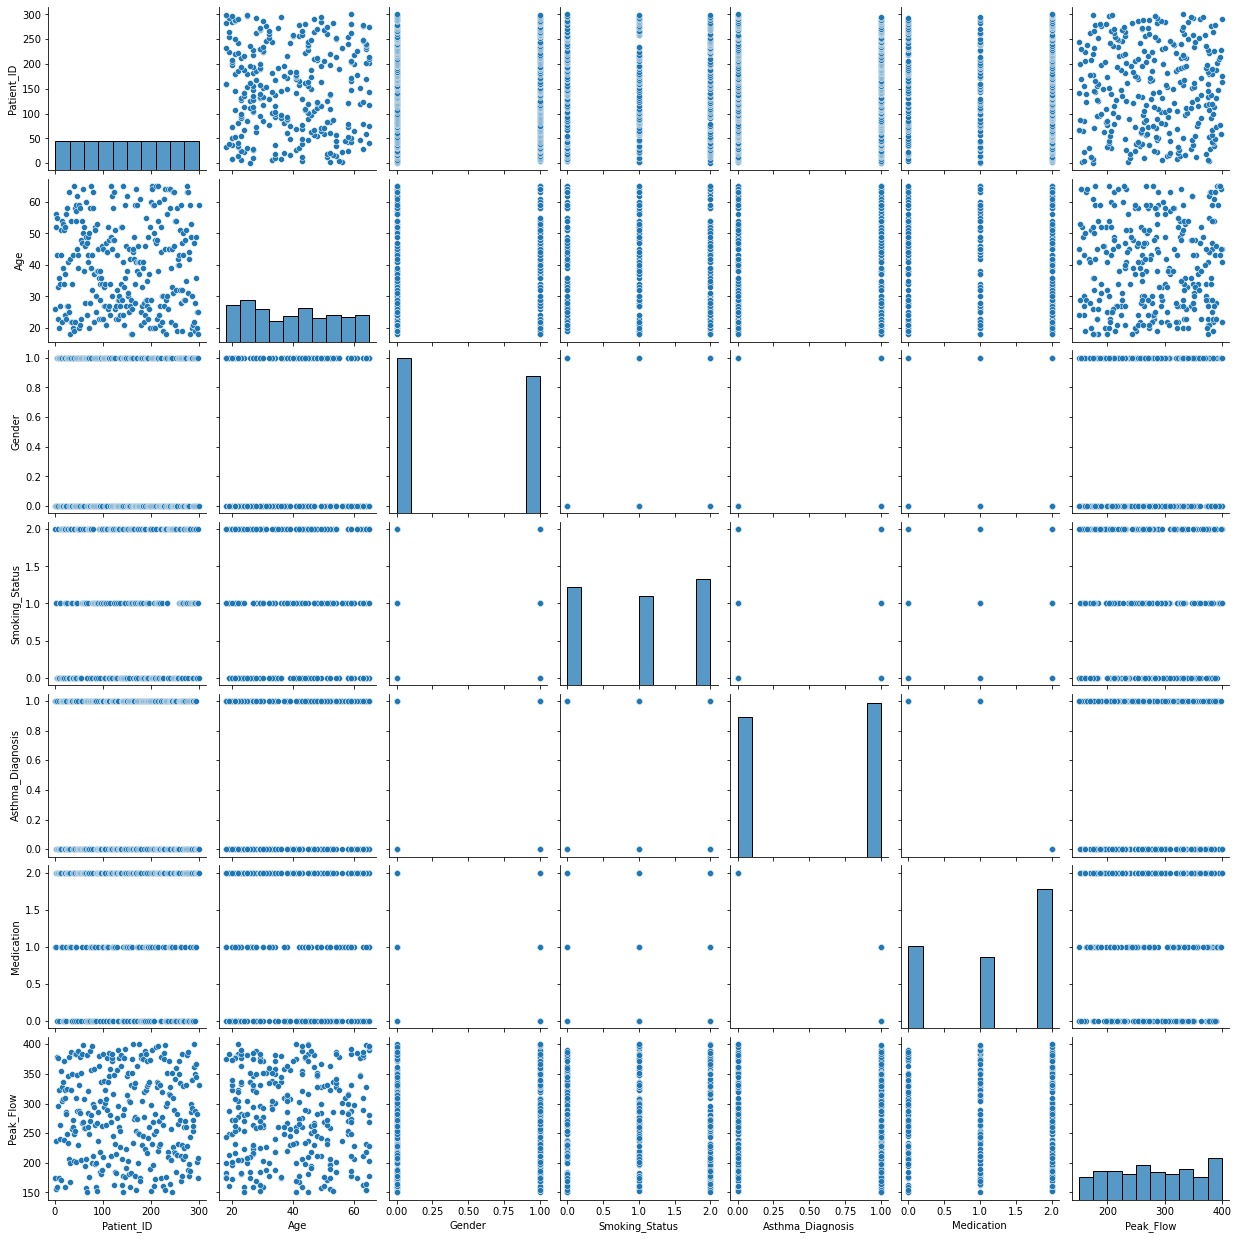

In [11]:
sns.pairplot(df)

In [12]:
X = df.drop(columns=['Asthma_Diagnosis'])
y = df['Asthma_Diagnosis']

In [13]:
y = np.reshape(y.values,(y.shape[0],1))

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
new_data = np.hstack((X, np.reshape(y[:], (-1, 1))))
transformed_df = pd.DataFrame(df, columns = df.columns)

In [15]:
X.shape

(300, 6)

In [16]:
y.shape

(300, 1)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=100)

In [18]:
dense_layers = [2]
layer_sizes = [128]


for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        model = Sequential()
        model.add(Activation('relu'))
        model.add(Flatten())

        for _ in range(dense_layer):
            model.add(Dense(layer_size))
            model.add(Activation('relu'))

        model.add(Dense(1))
        model.add(Activation('sigmoid'))
        NAME = "{}-nodes-{}-dense-{}".format( layer_size, dense_layer, int(time.time()))
        tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

        model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'],
                          )
        model.fit(X_train, y_train,batch_size=5,epochs=20,validation_split = 0.1,callbacks=[tensorboard])
        
        y_pred_prob = model.predict(X_val)
        y_pred = (y_pred_prob > 0.5).astype(int)
        

Epoch 1/20
49/49 [==============================] - 2s 11ms/step - loss: 0.5409 - accuracy: 0.8189 - val_loss: 0.3602 - val_accuracy: 0.9259
Epoch 2/20
49/49 [==============================] - 0s 7ms/step - loss: 0.1491 - accuracy: 1.0000 - val_loss: 0.0568 - val_accuracy: 1.0000
Epoch 3/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 4/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 5/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 6/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 7/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 8/20
49/49 [=

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)

In [20]:
cm

array([[15,  0],
       [ 0, 15]], dtype=int64)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 activation (Activation)     (None, 6)                 0         
                                                                 
 flatten (Flatten)           (None, 6)                 0         
                                                                 
 dense (Dense)               (None, 128)               896       
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [22]:
pickle.dump(model, open("./models/asthma.pkl",'wb'))